In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('viridis')

regions = ['nsw', 'sa']
y_axis_var = 'net_load'

dfs = []
for region in regions:
    df = pd.read_csv(f'../data/{region}/merged.csv')
    df.datetime = df.datetime.astype('datetime64')
    df['region'] = region
    dt = df['datetime'].dt
    df['year'] = dt.year
    df['month'] = dt.month
    df['day'] = dt.day
    df['hour'] = dt.hour
    df['minute'] = dt.minute
    df['day_of_week'] = dt.weekday.astype('str') + '-' + dt.day_name().str[:3]
    df['isoyear'] = dt.isocalendar().year
    df['week'] = dt.isocalendar().week
    df['day_of_year'] = dt.day_of_year
    df['week_of_month'] = (dt.day - 1) // 7 # day of month - 1 (0-30) // 7 (0-6=0, 7-13=1, 14-20=2, 21-27=3, 28-x=4)
    dfs.append(df)
df = pd.concat(dfs)
df.head()

,datetime,net_load,total_load,pv_est,tempc_cbr,cloud8_cbr,windk_cbr,wdir_cbr,humid_cbr,rainmm_cbr,...,week,day_of_year,week_of_month,tempc,cloud8,windk,wdir,humid,rainmm,radkjm2
0,2018-03-06 10:00:00,8499.5,8332.145,434.3715,19.0,2.0,15.0,110.0,52.0,0.0,...,10,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-06 11:00:00,8457.0,8294.325,468.8860,19.4,1.0,14.0,140.0,49.0,0.0,...,10,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-03-06 12:00:00,8396.0,8248.405,483.1315,19.1,4.0,15.0,150.0,52.0,0.0,...,10,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-03-06 13:00:00,8341.5,8193.080,491.4175,19.4,4.0,14.0,140.0,55.0,0.0,...,10,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-03-06 14:00:00,8321.5,8185.100,487.9780,18.9,7.0,17.0,120.0,57.0,0.0,...,10,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


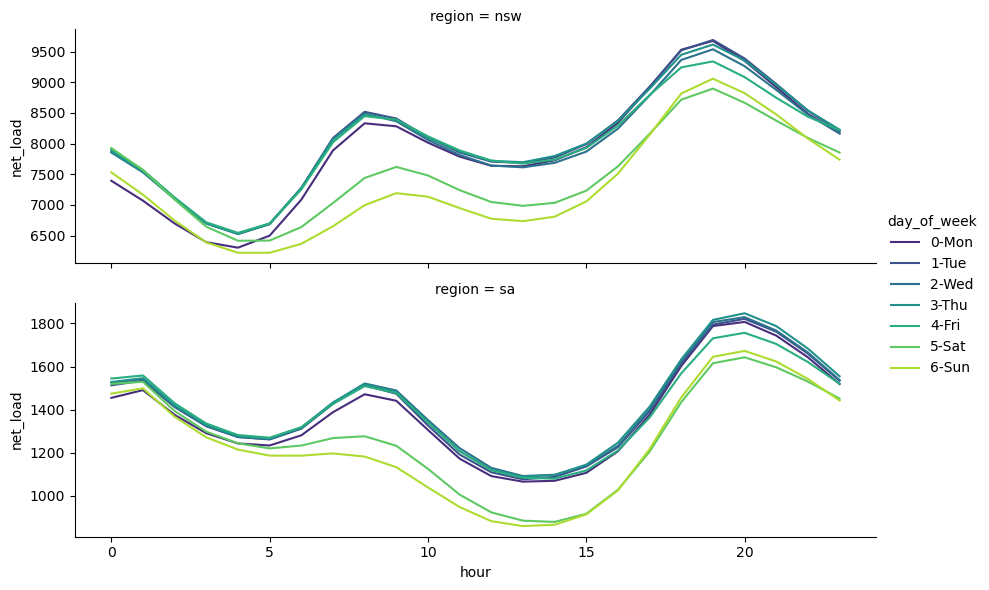

In [5]:
grouped_dow = df.groupby(['region', 'day_of_week', 'hour', 'minute'])[[y_axis_var]].mean()
g = sns.FacetGrid(grouped_dow.reset_index(), row='region', hue='day_of_week', palette='viridis', sharey=False, aspect=3)
g.map(sns.lineplot, 'hour', y_axis_var)
g.add_legend()

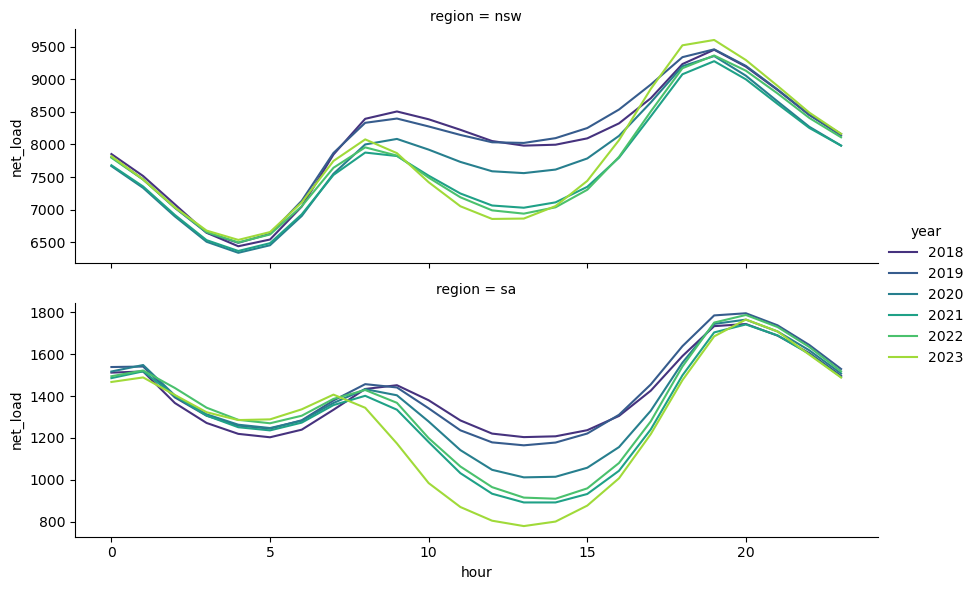

In [10]:
grouped_dow = df.groupby(['region', 'year', 'hour', 'minute'])[[y_axis_var]].mean()
g = sns.FacetGrid(grouped_dow.reset_index(), row='region', hue='year', palette='viridis', sharey=False, aspect=3)
g.map(sns.lineplot, 'hour', y_axis_var)
g.add_legend()

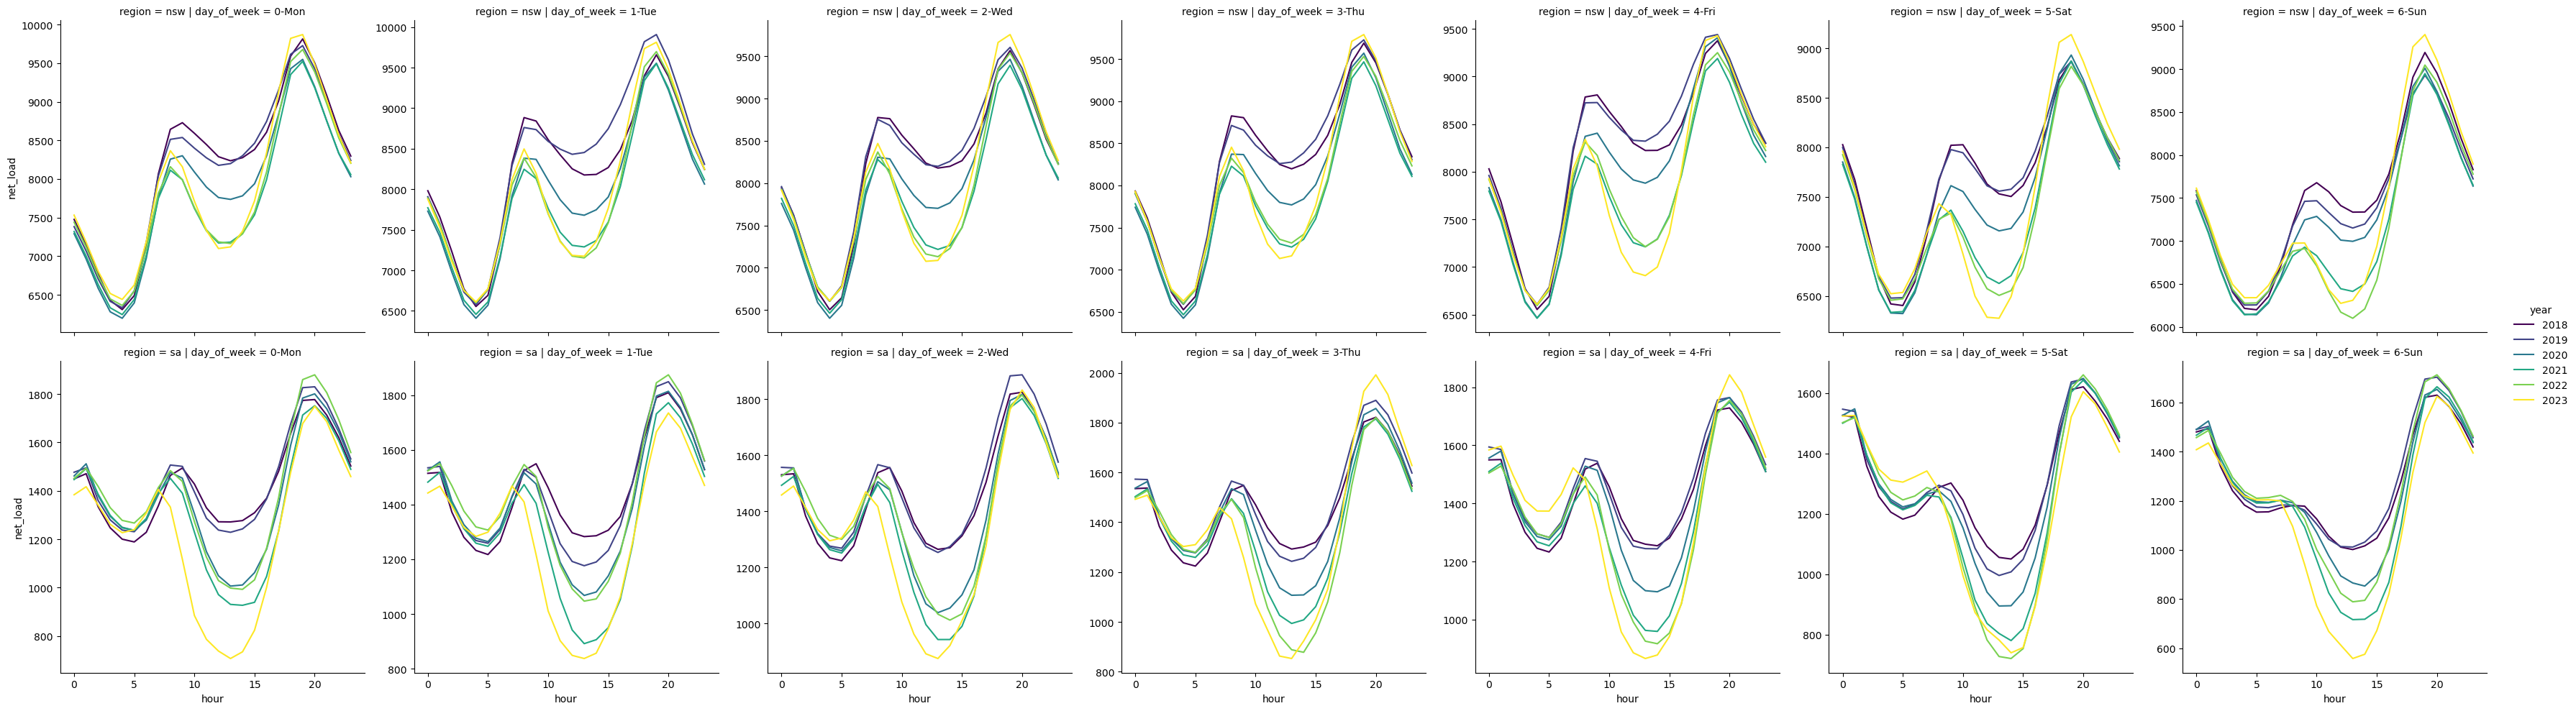

In [9]:
grouped_year_dow = df.groupby(['region', 'year', 'day_of_week', 'hour', 'minute'])[[y_axis_var]].mean()
# sns.lineplot(x='hour', y=y_axis_var, data=grouped_year_dow, hue='year', palette=sns.color_palette('viridis', as_cmap=True))
sns.relplot(grouped_year_dow.reset_index(), x='hour', y=y_axis_var, hue='year', 
            row='region', col='day_of_week', palette='viridis', kind='line', facet_kws={'sharey':False}, aspect=1)

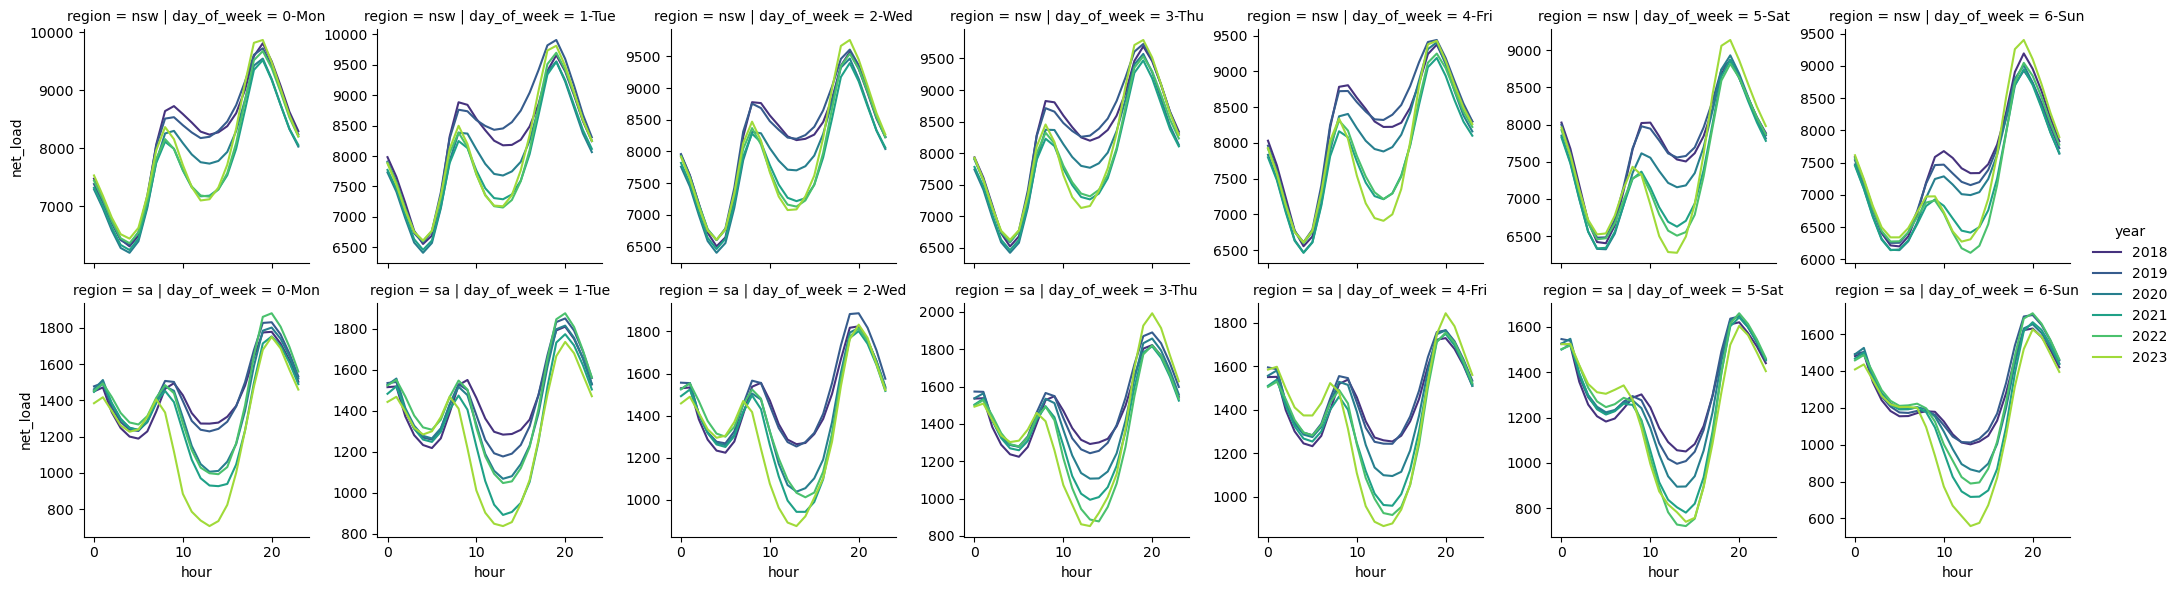

In [10]:
g = sns.FacetGrid(grouped_year_dow.reset_index(), row='region', col='day_of_week', hue='year', palette='viridis', sharey=False)
g.map(sns.lineplot, 'hour', y_axis_var)
g.add_legend()

<Axes: xlabel='month', ylabel='net_load'>

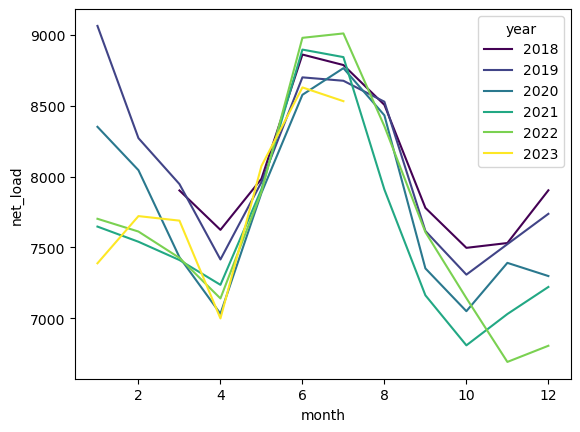

In [13]:
grouped_week = df.groupby(['year', 'month'])[[y_axis_var]].mean().reset_index().astype('int')
sns.lineplot(x='month', y=y_axis_var, data=grouped_week, hue='year', palette='viridis')

<Axes: xlabel='year_month', ylabel='net_load'>

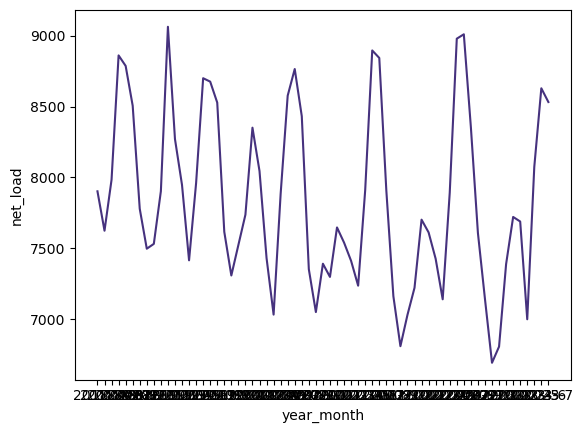

In [24]:
grouped_week = df.groupby(['year', 'month'])[[y_axis_var]].mean().reset_index().astype('int')
grouped_week['year_month'] = grouped_week['year'].astype('str') + '-' + grouped_week['month'].astype('str')
sns.lineplot(x='year_month', y=y_axis_var, data=grouped_week)

In [14]:
# grouped_year_month_dow = df.groupby(['year', 'month', 'day_of_week', 'hour', 'minute'])[[y_axis_var]].mean()
# g = sns.FacetGrid(grouped_year_month_dow.reset_index(), row='month', col='day_of_week',
#                   hue='year', palette='viridis')
# g.map(sns.lineplot, 'hour', y_axis_var)
# g.add_legend()

In [15]:
# grouped_month_week_dow = df[df.year == 2022].groupby(['year', 'month', 'week_of_month', 'day_of_week', 'hour', 'minute'])[[y_axis_var]].mean() # mean of one observation
# g = sns.relplot(
#     data=grouped_month_week_dow.reset_index(), x='hour', y=y_axis_var,
#     row='month', col='day_of_week', kind='line', errorbar=None,
#     hue='week_of_month', style='week_of_month', palette='viridis', legend='full')

In [16]:
# grouped_year_week_dow = df.groupby(['year', 'week', 'day_of_week', 'hour', 'minute'])[[y_axis_var]].mean()
# g = sns.relplot(
#     grouped_year_week_dow.reset_index(), x='hour', y=y_axis_var, row='week', col='day_of_week',
#     hue='year', palette='viridis', style='year', kind='line', legend='full', errorbar=None)